In [93]:
from datetime import date, timedelta
import seaborn as sns
import pandas as pd
import re
import os

In [94]:
corona = pd.read_csv("./data/2021-09-28_corona.csv")
vaccine = pd.read_csv("./data/20210929_14_vaccine_bloomberg.csv")
country_code = pd.read_csv("./data/country.csv")

corona.shape, vaccine.shape, country_code.shape

((222, 15), (207, 7), (227, 4))

In [95]:
country_code.columns

Index(['국문(코로나보드)', '영문(블룸버그)', '나라', '비고_뜻'], dtype='object')

In [96]:
vaccine

,index,국가,백신접종수,Enough_percent_people,1차접종,2차접종,일별접종수
0,0.0,Global Total,6.199444e+09,-999.0,-999.0,-999.0,29152868.0
1,1.0,Mainland China,2.203185e+09,78.7,78.6,73.0,3171286.0
2,2.0,India,8.765386e+08,32.0,46.7,16.8,7178901.0
3,3.0,EU,5.640300e+08,63.5,67.3,64.7,1052903.0
4,4.0,U.S.,3.911526e+08,61.1,64.4,55.8,701422.0
...,...,...,...,...,...,...,...
202,221.0,Nauru,1.486300e+04,57.2,58.6,55.8,4.0
203,222.0,St. Helena,7.892000e+03,65.8,72.7,58.9,8.0
204,223.0,Falkland Islands,4.407000e+03,73.5,87.7,59.2,202.0
205,224.0,Montserrat,2.871000e+03,28.7,29.7,27.8,2.0


In [97]:
country_code

,국문(코로나보드),영문(블룸버그),나라,비고_뜻
0,가나,Ghana,NaN,NaN
1,가봉,Gabon,NaN,NaN
2,가이아나,Guyana,NaN,NaN
3,감비아,Gambia,NaN,NaN
4,과들루프,NaN,프랑스,Guadeloupe
...,...,...,...,...
222,NaN,Nauru,NaN,나우루
223,NaN,Tonga,NaN,통가
224,NaN,Turkmenistan,NaN,투르크메니스탄
225,NaN,Jersey,NaN,저지


In [98]:
corona.head()

,국가,치명(%),완치(%),발생률,인구수,확진자합계,확진자1일,치료중합계,치료중1일,위중증합계,위중증1일,사망자합계,사망자1일,완치합계,완치1일
0,미국🇺🇸,1.6,76.0,133095,331002651,43942335,187382.0,9838383.0,-23963.0,21819.0,-275.0,709119,2781.0,33394833.0,208564.0
1,인도🇮🇳,1.3,97.8,24431,1380004385,33714241,21093.0,289782.0,-7388.0,8944.0,NaN,447699,337.0,32976760.0,28144.0
2,브라질🇧🇷,2.8,95.3,100592,212559417,21366395,14423.0,410502.0,-6613.0,8318.0,NaN,594702,218.0,20361191.0,20818.0
3,영국🇬🇧,1.8,80.7,113959,67886011,7701715,37485.0,1346396.0,3904.0,878.0,-38.0,136208,40.0,6219111.0,33541.0
4,러시아🇷🇺,2.8,88.9,51151,145934462,7464708,21559.0,623692.0,3339.0,2300.0,NaN,205531,852.0,6635485.0,17368.0


In [99]:
corona['한글표기'] = corona['국가'].str.extract('([ㄱ-ㅣ가-힣]+)')

In [100]:
corona.head()

,국가,치명(%),완치(%),발생률,인구수,확진자합계,확진자1일,치료중합계,치료중1일,위중증합계,위중증1일,사망자합계,사망자1일,완치합계,완치1일,한글표기
0,미국🇺🇸,1.6,76.0,133095,331002651,43942335,187382.0,9838383.0,-23963.0,21819.0,-275.0,709119,2781.0,33394833.0,208564.0,미국
1,인도🇮🇳,1.3,97.8,24431,1380004385,33714241,21093.0,289782.0,-7388.0,8944.0,NaN,447699,337.0,32976760.0,28144.0,인도
2,브라질🇧🇷,2.8,95.3,100592,212559417,21366395,14423.0,410502.0,-6613.0,8318.0,NaN,594702,218.0,20361191.0,20818.0,브라질
3,영국🇬🇧,1.8,80.7,113959,67886011,7701715,37485.0,1346396.0,3904.0,878.0,-38.0,136208,40.0,6219111.0,33541.0,영국
4,러시아🇷🇺,2.8,88.9,51151,145934462,7464708,21559.0,623692.0,3339.0,2300.0,NaN,205531,852.0,6635485.0,17368.0,러시아


In [101]:
col = corona.columns

In [102]:
col

Index(['국가', '치명(%)', '완치(%)', '발생률', '인구수', '확진자합계', '확진자1일', '치료중합계',
       '치료중1일', '위중증합계', '위중증1일', '사망자합계', '사망자1일', '완치합계', '완치1일', '한글표기'],
      dtype='object')

In [103]:
col = ['국가', '한글표기', '치명(%)', '완치(%)', '발생률', '인구수', '확진자합계', '확진자1일', '치료중합계',
       '치료중1일', '위중증합계', '위중증1일', '사망자합계', '사망자1일', '완치합계', '완치1일']

In [104]:
corona = corona[col].copy()

In [105]:
corona.head()

,국가,한글표기,치명(%),완치(%),발생률,인구수,확진자합계,확진자1일,치료중합계,치료중1일,위중증합계,위중증1일,사망자합계,사망자1일,완치합계,완치1일
0,미국🇺🇸,미국,1.6,76.0,133095,331002651,43942335,187382.0,9838383.0,-23963.0,21819.0,-275.0,709119,2781.0,33394833.0,208564.0
1,인도🇮🇳,인도,1.3,97.8,24431,1380004385,33714241,21093.0,289782.0,-7388.0,8944.0,NaN,447699,337.0,32976760.0,28144.0
2,브라질🇧🇷,브라질,2.8,95.3,100592,212559417,21366395,14423.0,410502.0,-6613.0,8318.0,NaN,594702,218.0,20361191.0,20818.0
3,영국🇬🇧,영국,1.8,80.7,113959,67886011,7701715,37485.0,1346396.0,3904.0,878.0,-38.0,136208,40.0,6219111.0,33541.0
4,러시아🇷🇺,러시아,2.8,88.9,51151,145934462,7464708,21559.0,623692.0,3339.0,2300.0,NaN,205531,852.0,6635485.0,17368.0


In [106]:
country_code.columns = ['han_code', 'eng_code', 'country', 'etc']
country_code.head()

,han_code,eng_code,country,etc
0,가나,Ghana,NaN,NaN
1,가봉,Gabon,NaN,NaN
2,가이아나,Guyana,NaN,NaN
3,감비아,Gambia,NaN,NaN
4,과들루프,NaN,프랑스,Guadeloupe


In [107]:
corona = corona.merge(country_code, left_on = '한글표기', right_on = 'han_code')

In [108]:
corona

,국가,한글표기,치명(%),완치(%),발생률,인구수,확진자합계,확진자1일,치료중합계,치료중1일,위중증합계,위중증1일,사망자합계,사망자1일,완치합계,완치1일,han_code,eng_code,country,etc
0,미국🇺🇸,미국,1.6,76.0,133095,331002651,43942335,187382.0,9838383.0,-23963.0,21819.0,-275.0,709119,2781.0,33394833.0,208564.0,미국,U.S.,NaN,NaN
1,인도🇮🇳,인도,1.3,97.8,24431,1380004385,33714241,21093.0,289782.0,-7388.0,8944.0,NaN,447699,337.0,32976760.0,28144.0,인도,India,NaN,NaN
2,브라질🇧🇷,브라질,2.8,95.3,100592,212559417,21366395,14423.0,410502.0,-6613.0,8318.0,NaN,594702,218.0,20361191.0,20818.0,브라질,Brazil,NaN,NaN
3,영국🇬🇧,영국,1.8,80.7,113959,67886011,7701715,37485.0,1346396.0,3904.0,878.0,-38.0,136208,40.0,6219111.0,33541.0,영국,U.K.,NaN,NaN
4,러시아🇷🇺,러시아,2.8,88.9,51151,145934462,7464708,21559.0,623692.0,3339.0,2300.0,NaN,205531,852.0,6635485.0,17368.0,러시아,Russia,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,서사하라🇪🇭,서사하라,10,80.0,17,597339,10,NaN,1.0,NaN,NaN,NaN,1,NaN,8.0,NaN,서사하라,NaN,NaN,Western Sahara
190,바누아투🇻🇺,바누아투,25,75.0,13,307145,4,NaN,0.0,NaN,NaN,NaN,1,NaN,3.0,NaN,바누아투,NaN,NaN,Republic of Vanuatu
191,사모아🇼🇸,사모아,-,100.0,15,198414,3,NaN,0.0,NaN,NaN,NaN,0,NaN,3.0,NaN,사모아,Samoa,NaN,NaN
192,세인트헬레나🇸🇭,세인트헬레나,-,100.0,329,6077,2,NaN,0.0,NaN,NaN,NaN,0,NaN,2.0,NaN,세인트헬레나,St. Helena,NaN,NaN


In [109]:
corona_all = corona.merge(vaccine, left_on='eng_code', right_on='국가')
corona_all.head()

,국가_x,한글표기,치명(%),완치(%),발생률,인구수,확진자합계,확진자1일,치료중합계,치료중1일,...,eng_code,country,etc,index,국가_y,백신접종수,Enough_percent_people,1차접종,2차접종,일별접종수
0,미국🇺🇸,미국,1.6,76.0,133095,331002651,43942335,187382.0,9838383.0,-23963.0,...,U.S.,NaN,NaN,4.0,U.S.,391152580.0,61.1,64.4,55.8,701422.0
1,인도🇮🇳,인도,1.3,97.8,24431,1380004385,33714241,21093.0,289782.0,-7388.0,...,India,NaN,NaN,2.0,India,876538600.0,32.0,46.7,16.8,7178901.0
2,브라질🇧🇷,브라질,2.8,95.3,100592,212559417,21366395,14423.0,410502.0,-6613.0,...,Brazil,NaN,NaN,5.0,Brazil,233261970.0,56.5,71.3,41.9,1317163.0
3,영국🇬🇧,영국,1.8,80.7,113959,67886011,7701715,37485.0,1346396.0,3904.0,...,U.K.,NaN,NaN,12.0,U.K.,93565470.0,70.0,73.0,67.1,63126.0
4,러시아🇷🇺,러시아,2.8,88.9,51151,145934462,7464708,21559.0,623692.0,3339.0,...,Russia,NaN,NaN,18.0,Russia,89865310.0,30.6,32.6,28.5,214966.0


In [111]:
corona_all.shape

(178, 27)

In [110]:
corona_all.isnull().sum()

국가_x                       0
한글표기                       0
치명(%)                      0
완치(%)                      3
발생률                        0
인구수                        0
확진자합계                      0
확진자1일                     27
치료중합계                      3
치료중1일                     31
위중증합계                     47
위중증1일                    120
사망자합계                      0
사망자1일                     57
완치합계                       3
완치1일                      45
han_code                   0
eng_code                   0
country                  177
etc                      178
index                      0
국가_y                       0
백신접종수                      0
Enough_percent_people      0
1차접종                       0
2차접종                       0
일별접종수                      0
dtype: int64

In [86]:
corona_all.drop(['국가_x', 'country', '국가_y'], axis=1, inplace=True)

In [87]:
corona_all.drop(['etc', 'index', 'han_code'], axis=1, inplace=True)

In [88]:
corona_all

,한글표기,치명(%),완치(%),발생률,인구수,확진자합계,확진자1일,치료중합계,치료중1일,위중증합계,...,사망자합계,사망자1일,완치합계,완치1일,eng_code,백신접종수,Enough_percent_people,1차접종,2차접종,일별접종수
0,미국,1.6,76.0,133095,331002651,43942335,187382.0,9838383.0,-23963.0,21819.0,...,709119,2781.0,33394833.0,208564.0,U.S.,391152580.0,61.1,64.4,55.8,701422.0
1,인도,1.3,97.8,24431,1380004385,33714241,21093.0,289782.0,-7388.0,8944.0,...,447699,337.0,32976760.0,28144.0,India,876538600.0,32.0,46.7,16.8,7178901.0
2,브라질,2.8,95.3,100592,212559417,21366395,14423.0,410502.0,-6613.0,8318.0,...,594702,218.0,20361191.0,20818.0,Brazil,233261970.0,56.5,71.3,41.9,1317163.0
3,영국,1.8,80.7,113959,67886011,7701715,37485.0,1346396.0,3904.0,878.0,...,136208,40.0,6219111.0,33541.0,U.K.,93565470.0,70.0,73.0,67.1,63126.0
4,러시아,2.8,88.9,51151,145934462,7464708,21559.0,623692.0,3339.0,2300.0,...,205531,852.0,6635485.0,17368.0,Russia,89865310.0,30.6,32.6,28.5,214966.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,마카오,-,90.0,109,649335,70,3.0,7.0,3.0,NaN,...,0,NaN,63.0,NaN,Macau,649564.0,47.8,51.2,44.6,4123.0
174,몬트세랫,3.0,90.9,6611,4992,33,NaN,2.0,NaN,NaN,...,1,NaN,30.0,NaN,Montserrat,2871.0,28.7,29.7,27.8,2.0
175,사모아,-,100.0,15,198414,3,NaN,0.0,NaN,NaN,...,0,NaN,3.0,NaN,Samoa,149431.0,37.2,49.3,25.0,981.0
176,세인트헬레나,-,100.0,329,6077,2,NaN,0.0,NaN,NaN,...,0,NaN,2.0,NaN,St. Helena,7892.0,65.8,72.7,58.9,8.0


In [89]:
corona_all.corr()

,완치(%),확진자합계,확진자1일,치료중합계,치료중1일,위중증합계,위중증1일,사망자합계,사망자1일,완치합계,완치1일,백신접종수,Enough_percent_people,1차접종,2차접종,일별접종수
완치(%),1.000000,0.034011,-0.063898,-0.074224,-0.028090,-0.034310,0.139966,0.034886,-0.049055,0.052528,-0.103847,0.054079,0.116262,0.097295,-0.016257,0.071575
확진자합계,0.034011,1.000000,0.801275,0.757237,-0.503805,0.913018,-0.835467,0.932022,0.794271,0.992485,0.804830,0.350432,0.115115,0.138337,0.049711,0.594224
확진자1일,-0.063898,0.801275,1.000000,0.973781,-0.516963,0.865098,-0.821438,0.707009,0.955632,0.726956,0.980165,0.190499,0.084610,0.084779,0.073876,0.171982
치료중합계,-0.074224,0.757237,0.973781,1.000000,-0.453842,0.843748,-0.827965,0.685907,0.949951,0.671757,0.943245,0.167471,0.081856,0.080385,0.035534,0.103159
치료중1일,-0.028090,-0.503805,-0.516963,-0.453842,1.000000,-0.607006,0.860044,-0.475057,-0.499238,-0.486234,-0.675222,-0.146671,-0.055624,-0.078543,-0.054892,-0.240545
위중증합계,-0.034310,0.913018,0.865098,0.843748,-0.607006,1.000000,-0.849897,0.887306,0.878249,0.876905,0.880771,0.702539,0.034659,0.062277,0.006731,0.499437
위중증1일,0.139966,-0.835467,-0.821438,-0.827965,0.860044,-0.849897,1.000000,-0.790392,-0.845907,-0.834567,-0.844414,-0.791848,-0.019808,-0.040743,-0.017533,-0.478399
사망자합계,0.034886,0.932022,0.707009,0.685907,-0.475057,0.887306,-0.790392,1.000000,0.731802,0.937049,0.725237,0.307284,0.106476,0.138694,0.049904,0.506341
사망자1일,-0.049055,0.794271,0.955632,0.949951,-0.499238,0.878249,-0.845907,0.731802,1.000000,0.722099,0.937455,0.483507,0.088468,0.092356,0.077532,0.202815
완치합계,0.052528,0.992485,0.726956,0.671757,-0.486234,0.876905,-0.834567,0.937049,0.722099,1.000000,0.735906,0.366822,0.115117,0.141518,0.049316,0.656474


In [91]:
corona_all.isnull().sum()

한글표기                       0
치명(%)                      0
완치(%)                      3
발생률                        0
인구수                        0
확진자합계                      0
확진자1일                     27
치료중합계                      3
치료중1일                     31
위중증합계                     47
위중증1일                    120
사망자합계                      0
사망자1일                     57
완치합계                       3
완치1일                      45
eng_code                   0
백신접종수                      0
Enough_percent_people      0
1차접종                       0
2차접종                       0
일별접종수                      0
dtype: int64

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import pandas as pd
import matplotlib
import platform
import os

In [53]:
path = "C:/Windows/Fonts/malgun.ttf"
if platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system()=="Darwin":
    rc('font', family='AppleGothic')
else:
    print("Unknown System")
    
matplotlib.rcParams['axes.unicode_minus'] = False

In [115]:
corona_all.loc[(corona_all['2차접종'] == -999), ['2차접종']] = 0

In [116]:
temp = corona_all.loc[(corona_all['확진자합계'] < 21366395), :]

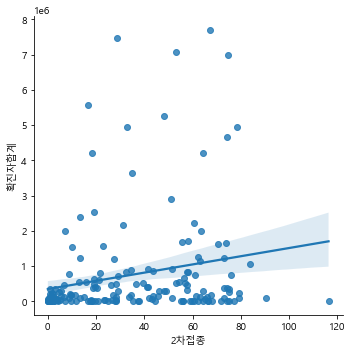

In [117]:
sns.lmplot(x='2차접종', y='확진자합계', data=temp)